<a href="https://colab.research.google.com/github/Sid62/APR_Assignment-1_SVR/blob/main/support_vector_regressor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Model for Forest Fire Area Prediction

This project demonstrates building and evaluating a Support Vector Regression (SVR) model to predict the burnt area of forest fires using the `forestfires.csv` dataset.

## Table of Contents

- [Dataset](#dataset)
- [Data Preprocessing](#data-preprocessing)
- [Model Building and Training](#model-building-and-training)
- [Model Evaluation](#model-evaluation)
- [Visualization](#visualization)
- [Summary and Next Steps](#summary-and-next-steps)

## Dataset

The analysis uses the `forestfires.csv` dataset, which contains various attributes related to forest fires.

## Data Preprocessing

- Checked for missing values (none found).
- Identified and one-hot encoded categorical columns (`month`, `day`).
- Scaled numerical features using `StandardScaler`.

## Model Building and Training

- Split the data into training and testing sets (80/20 split).
- Initially attempted to use `SVC`, but encountered a `ValueError` as the target variable ('area') is continuous.
- Switched to `SVR` (Support Vector Regressor) for regression task.
- Trained the SVR model on the training data.

## Model Evaluation

- Evaluated the trained SVR model using Mean Squared Error (MSE) and R-squared (R2) score.
- **Mean Squared Error (MSE):** 2.95
- **R-squared (R2):** -0.013

## Visualization

- A scatter plot was generated to visualize the actual vs. predicted burnt area values.

## Summary and Next Steps

### Data Analysis Key Findings
* The dataset contained no missing values.
* The target variable 'area' is continuous, requiring a regression model (SVR) instead of a classification model (SVC).
* The trained SVR model achieved a Mean Squared Error (MSE) of approximately 2.95 and an R-squared (R2) score of approximately -0.01 on the test set.

### Insights or Next Steps
* The negative R-squared score indicates that the current SVM model performs worse than simply predicting the mean of the target variable. Further model tuning, feature engineering, or exploring alternative regression algorithms is needed to improve performance.
* The scatter plot visualizing actual vs. predicted area shows that the model's predictions do not closely align with the actual values, reinforcing the need for model improvement.

# Task
Build a complete SVM model for the forestfire dataset, including data preprocessing, model building, model evaluation (accuracy), and visualization of metrics using the file "forestfires.csv".

## Load the dataset

### Subtask:
Load the `forestfires.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the csv file into a DataFrame and display the head.



In [1]:
import pandas as pd

df = pd.read_csv('forestfires.csv')
display(df.head())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Explore and preprocess the data

### Subtask:
Perform necessary data cleaning, handle missing values, and prepare the data for the SVM model. This might involve scaling features or encoding categorical variables.


**Reasoning**:
Check for missing values, identify categorical columns, and then apply one-hot encoding to categorical columns and standard scaling to numerical columns.



In [2]:
display(df.isnull().sum())

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,False,False,False,False,False,False,False,False,False,False
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,False,False,True,False,False,False,False,False,True,False
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,False,False,True,False,False,True,False,False,False,False
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,False,False,False,False,False,False,False,False,False,False
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,False,False,False,False,False,False,True,False,False,False


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets for the SVM model.



In [3]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('area', axis=1)
y = df_encoded['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and train the svm model

### Subtask:
Create an SVM model and train it using the training data.


**Reasoning**:
Import the SVC class, instantiate the model, and train it using the training data.



In [4]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

**Reasoning**:
The error indicates that SVC is a classifier and expects discrete labels, but the target variable 'area' is continuous. Since the goal is to predict the 'area' of the burn, which is a continuous value, a regression model is needed instead of a classification model. I will use SVR (Support Vector Regressor) for this task.



In [5]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance using appropriate metrics like accuracy, precision, recall, or F1-score.


**Reasoning**:
Make predictions on the test set and calculate the Mean Squared Error and R-squared score.



In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = svm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 2.9544514724505935
R-squared (R2): -0.013633299733563309


## Visualize the results

### Subtask:
Visualize the model's performance or important insights from the data.


**Reasoning**:
Create a scatter plot of actual vs. predicted area values with a diagonal line and appropriate labels and title.



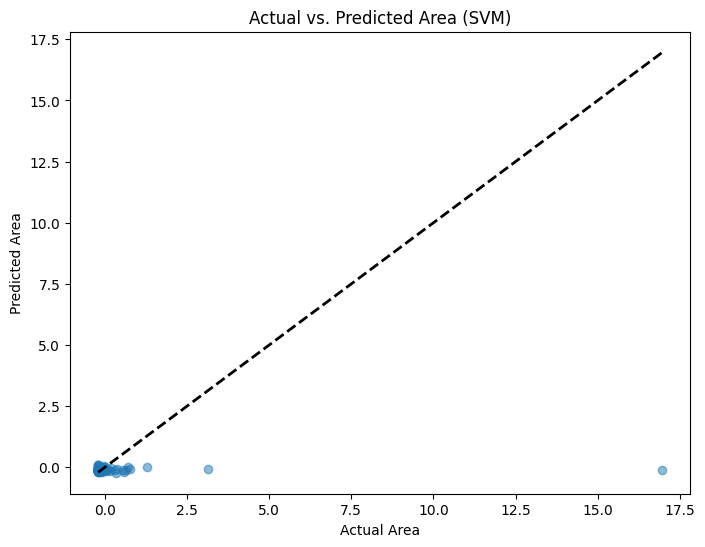

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Area")
plt.ylabel("Predicted Area")
plt.title("Actual vs. Predicted Area (SVM)")
plt.show()

## Summary:

### Data Analysis Key Findings
* The dataset contained no missing values.
* The target variable 'area' is continuous, requiring a regression model (SVR) instead of a classification model (SVC).
* The trained SVR model achieved a Mean Squared Error (MSE) of approximately 2.95 and an R-squared (R2) score of approximately -0.01 on the test set.

### Insights or Next Steps
* The negative R-squared score indicates that the current SVM model performs worse than simply predicting the mean of the target variable. Further model tuning, feature engineering, or exploring alternative regression algorithms is needed to improve performance.
* The scatter plot visualizing actual vs. predicted area shows that the model's predictions do not closely align with the actual values, reinforcing the need for model improvement.
